In [1]:
import numpy as np # linear algebra
import pandas as pd # dataframes
import matplotlib.pyplot as plt # General visualisations
import matplotlib.ticker as mtick # Axis visuals
import seaborn as sns # Statistical visualisations
from math import pi # Radar chart support
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, FunctionTransformer, LabelEncoder, RobustScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
damage = pd.read_csv("C:/Users/catsu/Desktop/Kitap5.csv",  delimiter=';')

In [2]:
print("Damage and Structure data has {} rows and {} columns".format(*damage.shape))

Damage and Structure data has 122110 rows and 56 columns


In [3]:
display(damage.dtypes.value_counts())
damage.dtypes

int64    56
Name: count, dtype: int64

building_id                                   int64
damage_overall_adjacent_building_risk         int64
damage_overall_collapse                       int64
damage_overall_leaning                        int64
damage_roof                                   int64
damage_corner_separation                      int64
damage_diagonal_cracking                      int64
damage_out_of_plane_failure                   int64
damage_gable_failure                          int64
damage_staircase                              int64
damage_out_of_plane_failure_walls_ncfr        int64
damage_in_plane_failure                       int64
damage_foundation                             int64
area_assesed                                  int64
damage_grade                                  int64
technical_solution_proposed                   int64
has_damage_foundation                         int64
has_damage_roof                               int64
has_damage_corner_separation                  int64
has_damage_d

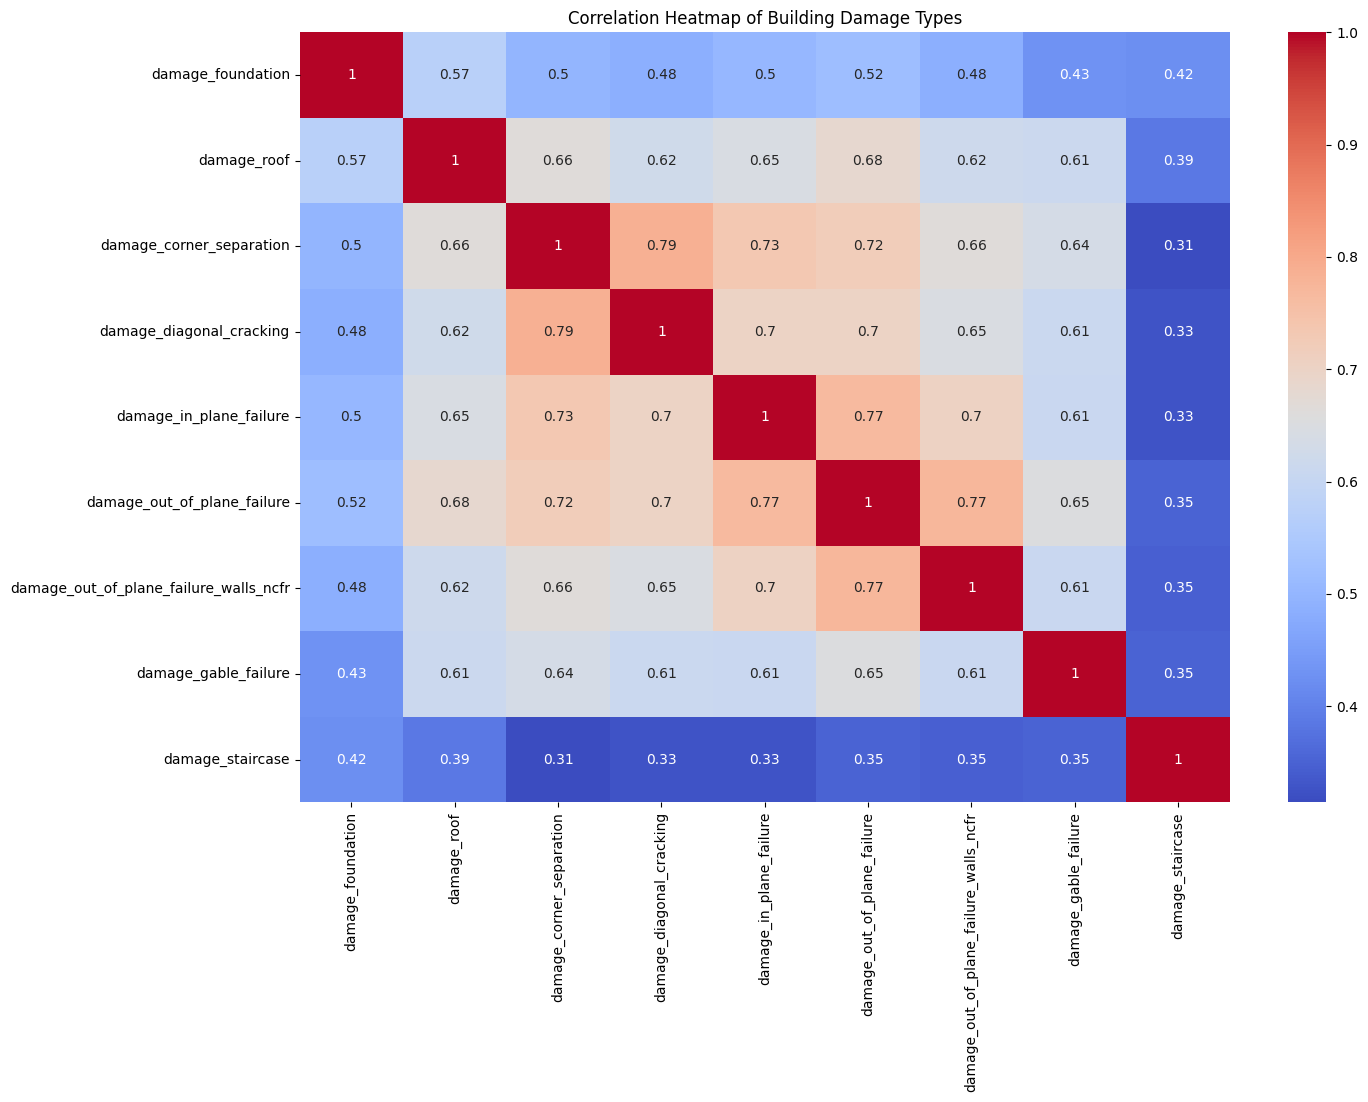

In [4]:

damage_columns = [
    'damage_foundation','damage_roof', 
    'damage_corner_separation', 
    'damage_diagonal_cracking', 
    'damage_in_plane_failure',
    'damage_out_of_plane_failure', 
    'damage_out_of_plane_failure_walls_ncfr', 
    'damage_gable_failure',
    'damage_staircase'
]

damage_corr = damage[damage_columns].apply(lambda x: x.astype('category').cat.codes).corr()

plt.figure(figsize=(15, 10))
sns.heatmap(damage_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Building Damage Types')
plt.show()


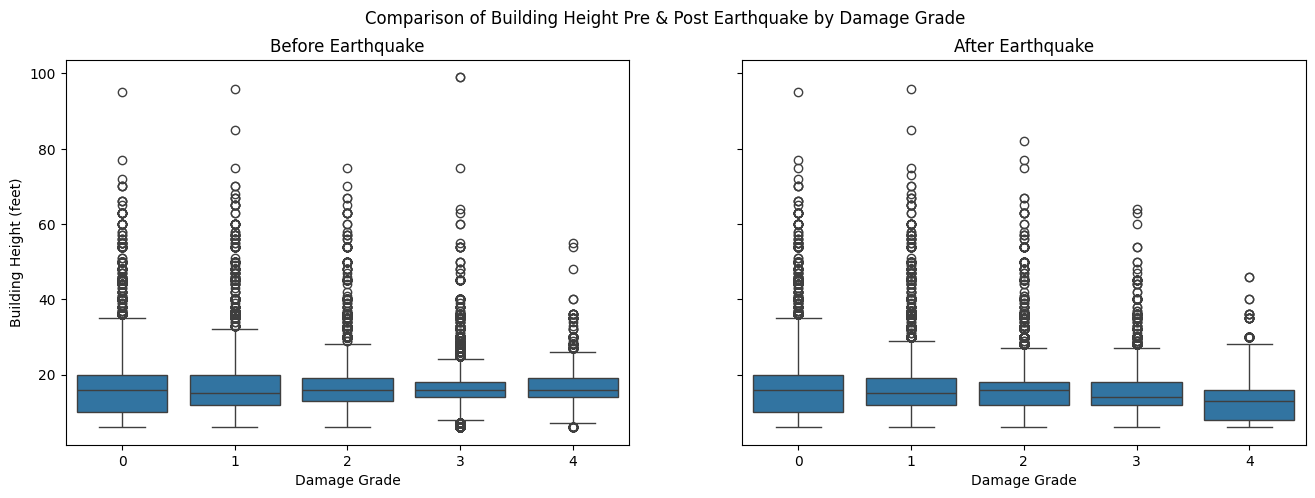

In [6]:
damage['damage_grade'] = damage['damage_grade'].astype('category')

damage_grade_order = ['0','1', '2', '3', '4']

fig, ax = plt.subplots(1, 2, figsize=(16, 5), sharey='row')
fig.suptitle("Comparison of Building Height Pre & Post Earthquake by Damage Grade")

ax[0].set_title("Before Earthquake")
sns.boxplot(data=damage, 
            x="damage_grade", 
            y="height_ft_pre_eq", 
            order=damage_grade_order,
            ax=ax[0])
ax[1].set_title("After Earthquake")
sns.boxplot(data=damage, 
            x="damage_grade", 
            y="height_ft_post_eq", 
            order=damage_grade_order,
            ax=ax[1])
plt.setp(ax[:], xlabel='Damage Grade')
plt.setp(ax[0], ylabel='Building Height (feet)')
plt.setp(ax[1], ylabel=None)
plt.show()

del fig, ax


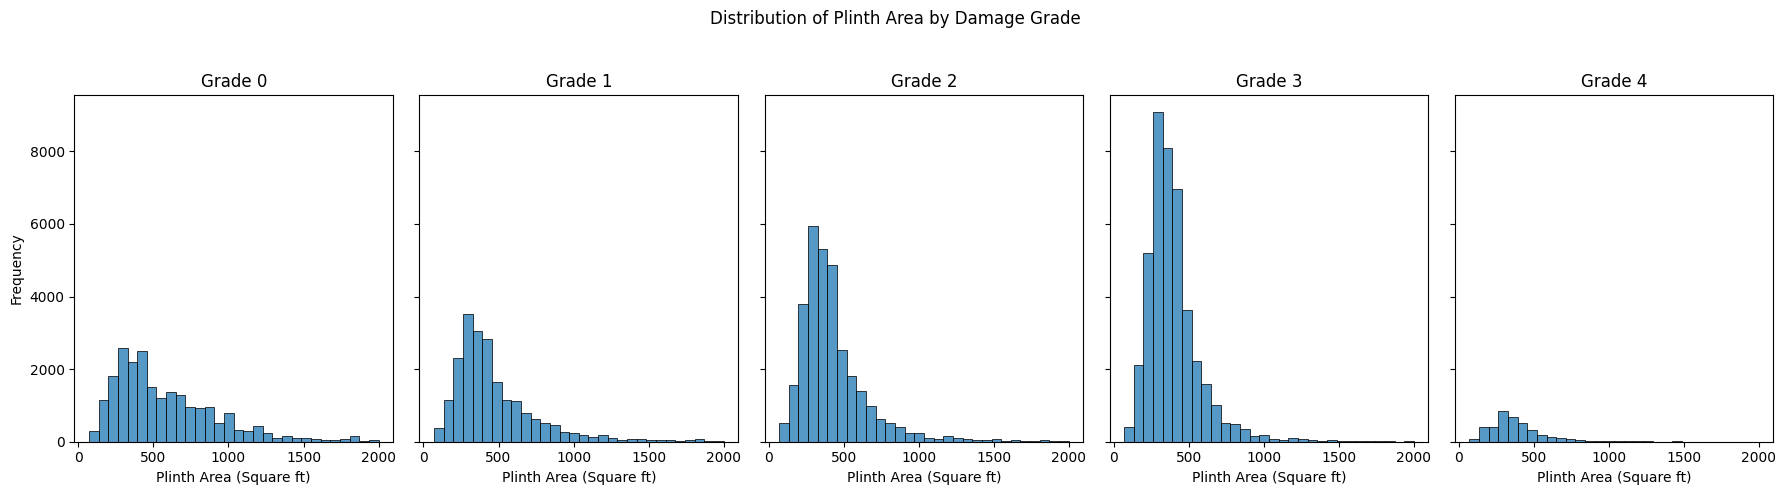

In [7]:

damage_grades = ['0','1', '2', '3', '4']

fig, ax = plt.subplots(1, 5, figsize=(18, 5), sharey="row", sharex="row")
fig.suptitle("Distribution of Plinth Area by Damage Grade")

for count, grade in enumerate(damage_grades):
    df_temp = damage[(damage['damage_grade'] == int(grade)) & (damage['plinth_area_sq_ft'] <= 2000)] # filter for grade
    ax[count].set_title(f'Grade {grade}')
    sns.histplot(data=df_temp, x='plinth_area_sq_ft', bins=30, kde=False, ax=ax[count])
    del df_temp
    
plt.setp(ax[:], xlabel='Plinth Area (Square ft)')
plt.setp(ax[0], ylabel='Frequency')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the suptitle
plt.show()

del grade, damage_grades, fig, ax, count


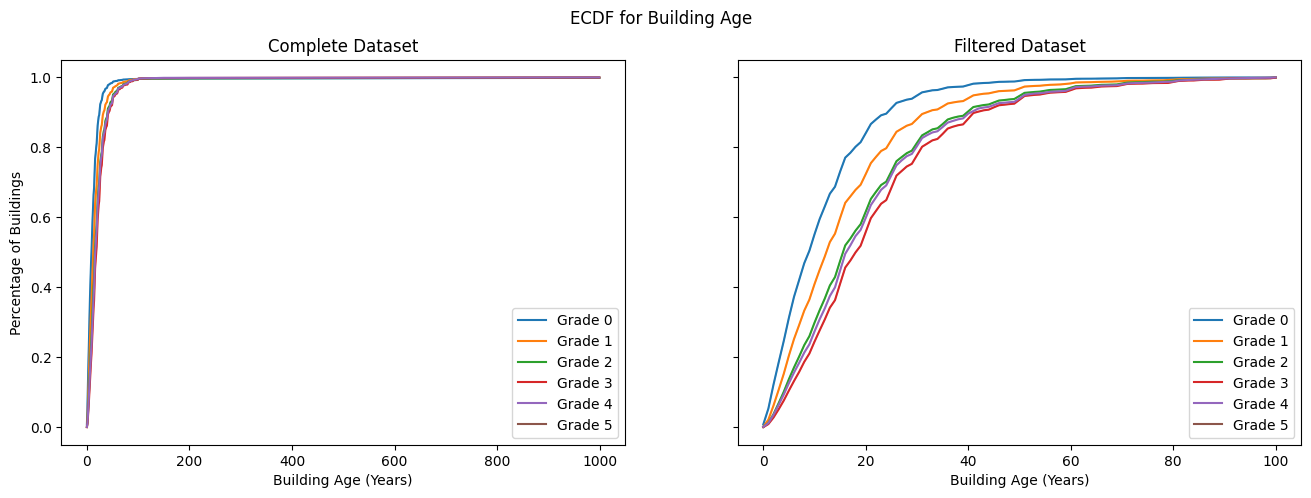

In [20]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    data = np.sort(data)
    n = len(data)
    y = np.arange(1, n+1) / n
    return pd.DataFrame({'x': data, 'y': y})


v_grades = [str(x) for x in range(0, 6)]

fig, ax = plt.subplots(1, 2, figsize=(16, 5), sharey='row')
fig.suptitle("ECDF for Building Age")
ax[0].set_title("Complete Dataset")
ax[1].set_title("Filtered Dataset")

for grade in v_grades:
    df_temp = damage[damage['damage_grade'] == int(grade)]  # filter for grade only
    df_temp = ecdf(df_temp['age_building'])  # Compute ECDF for grade
    sns.lineplot(data=df_temp, x='x', y='y', label=f'Grade {grade}', ax=ax[0])  # Generate line plot
    del df_temp

for grade in v_grades:
    df_temp = damage[(damage['damage_grade'] == int(grade)) & (damage['age_building'] <= 100)]  # filter
    df_temp = ecdf(df_temp['age_building'])  # Compute ECDF for grade
    sns.lineplot(data=df_temp, x='x', y='y', label=f'Grade {grade}', ax=ax[1])  # Generate line plot
    del df_temp

plt.setp(ax[:], xlabel='Building Age (Years)')
plt.setp(ax[0], ylabel='Percentage of Buildings')
plt.setp(ax[1], ylabel=None)
plt.show()

del grade, v_grades, fig, ax